# Spotify Extended Streaming History Analysis

## Import Relevant Libraries

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import calendar

## Load and Combine Json Files

In [ ]:
folder = "MyData"
paths = Path(folder).glob("*.json")
dfs = [pd.read_json(p) for p in paths]

df_raw = pd.concat(dfs, axis=0)
df_raw.head()

## Clean and format data

In [2]:
# MyData types
df_raw.dtypes

NameError: name 'df_raw' is not defined

In [4]:
# Drop redudant columns
df = df_raw.drop([
    'username',
    'platform', 
    'conn_country',
    'ip_addr_decrypted', 
    'user_agent_decrypted',
    'episode_show_name',
    'episode_name',
    'spotify_episode_uri',
    'incognito_mode'], axis=1)

# rename existing columns
df.rename(columns = {
    'master_metadata_track_name':'track_name',
    'master_metadata_album_artist_name':'artist_name',
    'master_metadata_album_album_name':'album_name'
}, inplace = True)

df.head()

,ts,ms_played,track_name,artist_name,album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp
0,2018-07-11T09:26:45Z,314760,Hot Stuff,Donna Summer,Bad Girls,spotify:track:2vaHFRlL8eLXKLhZ47CtpO,trackdone,trackdone,False,NaN,0.0,1.531301e+12
1,2023-01-25T00:37:11Z,208544,Coma Cat - Purple Disco Machine Re-Work,Tensnake,Coma Cat,spotify:track:1BMFet4vUoOgpLYIl3kVMQ,trackdone,trackdone,True,0.0,0.0,1.674607e+09
2,2019-09-27T01:46:36Z,135423,Who Can It Be Now?,Men At Work,Super Hits,spotify:track:4wt42dcsoaDNxdviz9k1dD,trackdone,fwdbtn,True,NaN,0.0,1.569549e+12
3,2019-04-06T10:16:09Z,275500,Sundream,RÜFÜS DU SOL,Atlas (Light/Dark Deluxe Edition),spotify:track:75W0TN4J1hdZInd8RuLxXN,trackdone,trackdone,True,NaN,0.0,1.554545e+12
4,2019-11-19T11:35:41Z,93440,Kids In America,Kim Wilde,Kim Wilde,spotify:track:1YGZyfvdgZxzipWoWYVKxi,trackdone,fwdbtn,True,NaN,0.0,1.574163e+12


In [5]:
# convert MyData to relevant types
df.ts = pd.to_datetime(df.ts)

df.dtypes

ts                   datetime64[ns, UTC]
ms_played                          int64
track_name                        object
artist_name                       object
album_name                        object
spotify_track_uri                 object
reason_start                      object
reason_end                        object
shuffle                             bool
skipped                          float64
offline                           object
offline_timestamp                float64
dtype: object

## Earliest Listened Song

In [6]:
earliest_song = df.iloc[df.ts.argmin()]
earliest_song.to_frame().T.reset_index(drop=True)

,ts,ms_played,track_name,artist_name,album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp
0,2012-10-14 12:03:43+00:00,7873,The A Team,Ed Sheeran,+,spotify:track:1VdZ0vKfR5jneCmWIUAMxK,uriopen,popup,False,1.0,0.0,0.0


## Latest Listened Song

In [7]:
latest_song = df.iloc[df.ts.argmax()]
latest_song.to_frame().T.reset_index(drop=True)

,ts,ms_played,track_name,artist_name,album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp
0,2023-04-19 21:56:18+00:00,240666,Scream Drive Faster,LAUREL,Scream Drive Faster,spotify:track:4hEpfRem37hLFT8ldr78Mx,trackdone,trackdone,True,0.0,0.0,1681941137.0


## Top 20 Listened Songs 

In [8]:
# Group the MyData by track and artist and calculate the number of plays and total play time
track_listens = df.groupby(['track_name', 'artist_name']).agg({'ms_played': ['count', 'sum']})
track_listens.columns = ['num_plays', 'total_ms_played']

# Reset the index to turn the track and artist name into columns
track_listens.reset_index(inplace=True)

# Sort the MyData by number of plays in descending order
# sort by num_plays or ms_played?
track_listens = track_listens.sort_values(by='num_plays', ascending=False)
track_listens.reset_index(inplace=True, drop=True)

track_listens.head(20)

,track_name,artist_name,num_plays,total_ms_played
0,Talking In Your Sleep,AG,1186,207866744
1,Perfect Places,Lorde,839,174764771
2,I'm Not Over,Carolina Liar,838,158920499
3,Habits (Stay High),Tove Lo,813,154522920
4,"Swan Song - From the Motion Picture ""Alita: Ba...",Dua Lipa,668,109671663
5,Teenage Dream,Katy Perry,654,131804732
6,Come Back To Me - Vicetone Remix,Urban Cone,639,107766600
7,I Miss the Misery,Halestorm,560,96858110
8,Take Me,RÜFÜS DU SOL,550,102313050
9,Nevermind,Dennis Lloyd,548,78486181


## Top 20 Listened Artists

In [9]:
top_artists = df.groupby('artist_name').size().to_frame().rename({0 : 'listen_count'}, axis=1).sort_values(by='listen_count', ascending=False)
top_artists.reset_index(inplace=True)
top_artists.head(20)

,artist_name,listen_count
0,Dua Lipa,6419
1,RÜFÜS DU SOL,4804
2,Fleetwood Mac,3370
3,The Veronicas,2766
4,G-Eazy,2436
5,Calvin Harris,1927
6,The Chainsmokers,1912
7,Vicetone,1831
8,Katy Perry,1667
9,Bombs Away,1527


# Top 10 Songs by Year

In [10]:
year_min = df.ts.min().year
year_max = df.ts.max().year

for year in range(year_min, year_max + 1):
    top_songs_by_year = df.loc[df.ts.between(f'{year}-1-1', f'{year}-12-31')]
    top_songs_by_year = top_songs_by_year.groupby(['track_name', 'artist_name']).size().to_frame().rename({0 : 'listen_count'}, axis=1).sort_values(by='listen_count', ascending=False)
    top_songs_by_year.reset_index(inplace=True)
    
    display(year)
    display(top_songs_by_year.head(10))

2012

,track_name,artist_name,listen_count
0,Hall of Fame (feat. will.i.am),The Script,9
1,One More Night,Maroon 5,8
2,Good Time,Owl City,8
3,Where Them Girls At (feat. Nicki Minaj & Flo R...,David Guetta,8
4,I Cry,Flo Rida,7
5,Lego House,Ed Sheeran,6
6,We Are Never Ever Getting Back Together,Taylor Swift,5
7,Club Can't Handle Me (feat. David Guetta) - Fr...,Flo Rida,5
8,Some Nights,fun.,5
9,Call Me Maybe,Carly Rae Jepsen,4


2013

,track_name,artist_name,listen_count
0,Living Next Door to Alice,Smokie,9
1,One More Night,Maroon 5,6
2,Sweet Nothing (feat. Florence Welch),Calvin Harris,6
3,We Are Never Ever Getting Back Together,Taylor Swift,6
4,Diamonds,Rihanna,6
5,Battle Scars - featuring Lupe Fiasco,Guy Sebastian,5
6,Sorry For Party Rocking,LMFAO,5
7,Sexy And I Know It,LMFAO,5
8,Where Them Girls At (feat. Nicki Minaj & Flo R...,David Guetta,4
9,Break Your Heart,Taio Cruz,4


2014

,track_name,artist_name,listen_count
0,Poker Face,Lady Gaga,3
1,Sweetest Thing - The Single Mix,U2,2
2,All Around The World,Justin Bieber,2
3,Whistle,Flo Rida,2
4,Where Them Girls At (feat. Nicki Minaj & Flo R...,David Guetta,2
5,Just Dance,Lady Gaga,2
6,Bleed It Out,Linkin Park,2
7,Crazy,Gnarls Barkley,2
8,Living Next Door to Alice,Smokie,2
9,Call Me Maybe,Carly Rae Jepsen,2


2015

,track_name,artist_name,listen_count
0,679 (feat. Remy Boyz),Fetty Wap,1
1,Sugar,Maroon 5,1
2,Where Are Ü Now (with Justin Bieber),Jack Ü,1
3,What Do You Mean?,Justin Bieber,1
4,Watch Me (Whip / Nae Nae),Silentó,1
5,Uptown Funk (feat. Bruno Mars),Mark Ronson,1
6,Trap Queen,Fetty Wap,1
7,The Hills,The Weeknd,1
8,The Fix (feat. Jeremih),Nelly,1
9,That's How You Know (feat. Kid Ink & Bebe Rexha),Nico & Vinz,1


2016

,track_name,artist_name,listen_count


2017

,track_name,artist_name,listen_count
0,Find You,Nick Jonas,254
1,Adventure of a Lifetime,Coldplay,240
2,"Homemade Dynamite (Feat. Khalid, Post Malone &...",Lorde,218
3,Take Me,RÜFÜS DU SOL,204
4,U + Ur Hand,P!nk,193
5,Friends (with BloodPop®),Justin Bieber,178
6,"Let Me Go (with Alesso, Florida Georgia Line &...",Hailee Steinfeld,172
7,Feel It Still,Portugal. The Man,172
8,How Long,Charlie Puth,169
9,Havana (feat. Young Thug),Camila Cabello,138


2018

,track_name,artist_name,listen_count
0,Nevermind,Dennis Lloyd,494
1,Fire,Peking Duk,445
2,I Said Hi,Amy Shark,424
3,Nothing to Regret,Robinson,420
4,Chasing Fire,Lauv,415
5,Side Effects (feat. Emily Warren),The Chainsmokers,415
6,Just Friends,Hayden James,404
7,Come Back To Me - Vicetone Remix,Urban Cone,377
8,So Far Away (feat. Jamie Scott & Romy Dya),Martin Garrix,371
9,Find Me,Sigma,353


2019

,track_name,artist_name,listen_count
0,Perfect Places,Lorde,824
1,I'm Not Over,Carolina Liar,746
2,"Swan Song - From the Motion Picture ""Alita: Ba...",Dua Lipa,621
3,I Miss the Misery,Halestorm,528
4,Paris Collides,RÜFÜS DU SOL,399
5,Better Luck Next Time - Radio Edit,Bombs Away,396
6,Unforgiven,RÜFÜS DU SOL,342
7,Talk To Me,RÜFÜS DU SOL,337
8,Don't Start Now,Dua Lipa,319
9,Rhiannon (Will You Ever Win) - 2018 Remaster,Fleetwood Mac,311


2020

,track_name,artist_name,listen_count
0,Talking In Your Sleep,AG,1135
1,Habits (Stay High),Tove Lo,762
2,"You're Gonna Go Far, Kid",The Offspring,314
3,Alone With You,Blonde Diamond,263
4,Physical,Dua Lipa,253
5,Sweet Dreams,Marcus Layton,244
6,Blackout,Breathe Carolina,242
7,Wicked Game,loafers,228
8,Torn - KREAM Remix,Ava Max,214
9,Fade To Grey,Visage,200


2021

,track_name,artist_name,listen_count
0,Teenage Dream,Katy Perry,568
1,Teach Me To Fight,YONAKA,247
2,Leviathan,G-Eazy,187
3,Toxic,Niels Van Gogh,162
4,Waking Up In Vegas,Katy Perry,160
5,Fais le vide,Bilal Hassani,145
6,Dream On (Glee Cast Version) (feat. Neil Patri...,Glee Cast,143
7,Cold Heart - PNAU Remix,Elton John,133
8,Kids In The Corner,Amber Van Day,132
9,crushcrushcrush,Paramore,131


2022

,track_name,artist_name,listen_count
0,Baobhan Sith,SYR,239
1,It Won't Kill Ya,The Chainsmokers,215
2,Lying,Amy Meredith,190
3,The Motto,Tiësto,162
4,Black Sheep - Brie Larson Vocal Version,Metric,158
5,Desdemona,The Beaches,136
6,Forever (in my mind),MALINDA,125
7,Wasted Nun,Cherry Glazerr,97
8,HONEY,LUNA AURA,94
9,"You Know My Name - From ""Casino Royale"" Soundt...",Chris Cornell,84


2023

,track_name,artist_name,listen_count
0,Jacques,Jax Jones,157
1,Scream Drive Faster,LAUREL,151
2,"Kernkraft 400 - DJ Gius Mix, Radio Edit",Zombie Nation,96
3,My Heart Has Teeth - From “Resident Evil”,deadmau5,62
4,Shake The Tree,Simon Field,60
5,10:35,Tiësto,55
6,Start Again,Connor Price,46
7,Sun Goes Down (feat. Jasmine Thompson) - Radio...,Robin Schulz,46
8,Come Back To Me - Vicetone Remix,Urban Cone,42
9,Love Me Again,John Newman,42


# Top 10 Artists by Year

In [11]:
for year in range(year_min, year_max + 1):
    top_artists_by_year = df.loc[df.ts.between(f'{year}-1-1', f'{year}-12-31')]
    top_artists_by_year = top_artists_by_year.groupby('artist_name').size().to_frame().rename({0 : 'listen_count'}, axis=1).sort_values(by='listen_count', ascending=False)
    top_artists_by_year.reset_index(inplace=True)
    
    display(year)
    display(top_artists_by_year.head(10))

2012

,artist_name,listen_count
0,Big Time Rush,29
1,Flo Rida,18
2,Maroon 5,13
3,David Guetta,13
4,Justin Bieber,10
5,Ed Sheeran,9
6,The Script,9
7,Owl City,8
8,fun.,6
9,Justin Timberlake,5


2013

,artist_name,listen_count
0,LMFAO,18
1,Calvin Harris,11
2,Katy Perry,11
3,David Guetta,11
4,Bruno Mars,10
5,Smokie,9
6,Guy Sebastian,8
7,Justin Bieber,8
8,Taio Cruz,8
9,Maroon 5,8


2014

,artist_name,listen_count
0,Linkin Park,8
1,Lady Gaga,5
2,Katy Perry,5
3,Flo Rida,5
4,Bruno Mars,4
5,Kesha,4
6,Justin Bieber,4
7,Gnarls Barkley,2
8,U2,2
9,Taio Cruz,2


2015

,artist_name,listen_count
0,The Weeknd,2
1,Fetty Wap,2
2,Major Lazer,2
3,DJ Snake,1
4,Nelly,1
5,Silentó,1
6,Selena Gomez,1
7,Robin Schulz,1
8,R. City,1
9,OMI,1


2016

,artist_name,listen_count


2017

,artist_name,listen_count
0,Nick Jonas,259
1,Charlie Puth,258
2,P!nk,256
3,Coldplay,245
4,Lorde,225
5,RÜFÜS DU SOL,214
6,Hailee Steinfeld,198
7,Justin Bieber,179
8,Ed Sheeran,174
9,Portugal. The Man,172


2018

,artist_name,listen_count
0,Dua Lipa,1573
1,The Veronicas,1259
2,Post Malone,882
3,Luke Bryan,799
4,The Chainsmokers,733
5,Lauv,666
6,Calvin Harris,643
7,G-Eazy,590
8,Dennis Lloyd,494
9,Martin Garrix,485


2019

,artist_name,listen_count
0,Fleetwood Mac,2504
1,RÜFÜS DU SOL,2247
2,Dua Lipa,1766
3,Lorde,877
4,Carolina Liar,753
5,Halestorm,681
6,Calvin Harris,587
7,Billy Idol,490
8,Bombs Away,430
9,Jax Jones,424


2020

,artist_name,listen_count
0,Dua Lipa,2151
1,AG,1135
2,Tove Lo,762
3,Bombs Away,478
4,The Offspring,470
5,Krewella,403
6,The Veronicas,350
7,Big Time Rush,342
8,Calvin Harris,285
9,Daft Punk,284


2021

,artist_name,listen_count
0,RÜFÜS DU SOL,1209
1,Katy Perry,1197
2,G-Eazy,1187
3,Vicetone,844
4,Dua Lipa,706
5,The Veronicas,648
6,GIMS,531
7,Elton John,489
8,Lucas Estrada,467
9,Evanescence,377


2022

,artist_name,listen_count
0,The Chainsmokers,812
1,Maroon 5,525
2,Breathe Carolina,487
3,RÜFÜS DU SOL,470
4,Bombs Away,443
5,Krewella,414
6,SYR,410
7,Cobra Starship,305
8,OneRepublic,303
9,Pete Murray,300


2023

,artist_name,listen_count
0,Jax Jones,414
1,LUNA AURA,332
2,Ellie Goulding,195
3,Linkin Park,179
4,Lady Gaga,177
5,Luke Bryan,173
6,Halestorm,159
7,LAUREL,151
8,Zombie Nation,148
9,Avril Lavigne,121


# Song Listens Timeline

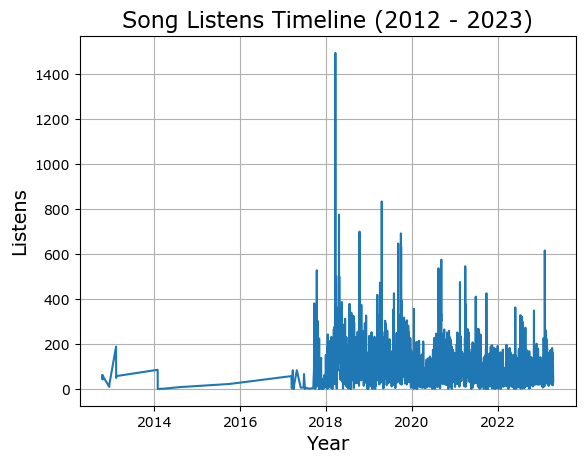

In [12]:
songs_by_year = df.groupby(df.ts.dt.date).size().to_frame().rename({0 : 'listen_count'}, axis=1)
songs_by_year.reset_index(inplace=True)

plt.plot(songs_by_year.ts, songs_by_year.listen_count)
plt.title(f'Song Listens Timeline ({year_min} - {year_max})', fontsize=16)
plt.ylabel('Listens', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(True)
plt.show()

# What Years do you Listen to the Most Songs?

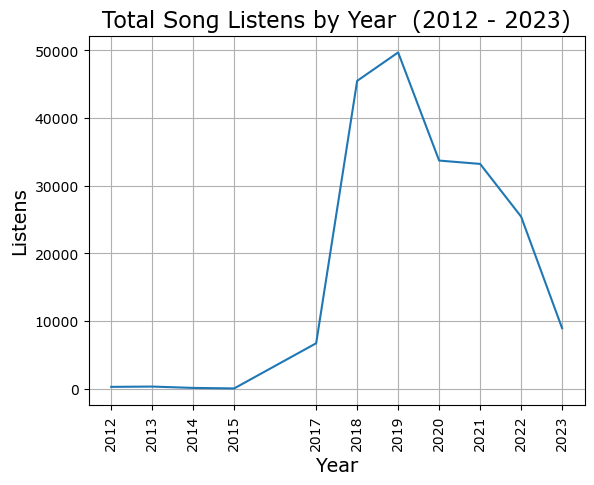

In [13]:
songs_by_year = df.groupby(df.ts.dt.year).size().to_frame().rename({0 : 'listen_count'}, axis=1)
songs_by_year.reset_index(inplace=True)

plt.plot(songs_by_year.ts, songs_by_year.listen_count)
plt.title(f'Total Song Listens by Year  ({year_min} - {year_max})', fontsize=16)
plt.ylabel('Listens', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(songs_by_year.ts, rotation=90)
plt.grid(True)
plt.show()

# What Months do you Listen to the Most Songs?

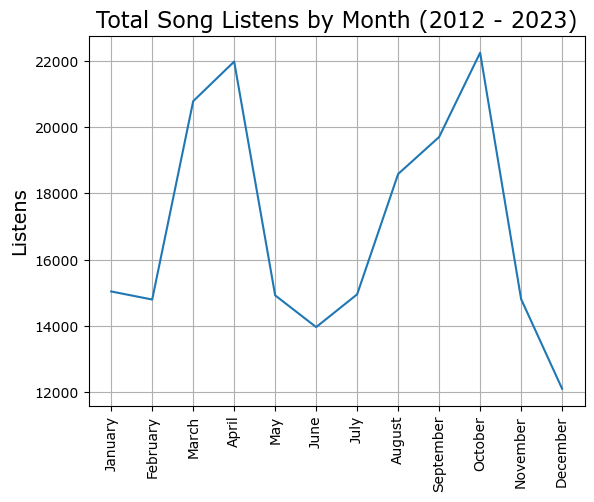

In [14]:
songs_by_month = df.groupby(df.ts.dt.month).size().to_frame().rename({0 : 'listen_count'}, axis=1)
songs_by_month.reset_index(inplace=True)
songs_by_month.ts.replace({index: month for index, month in enumerate(calendar.month_name) if month}, inplace=True)

plt.plot(songs_by_month.ts, songs_by_month.listen_count)
plt.title(f'Total Song Listens by Month ({year_min} - {year_max})', fontsize=16)
plt.ylabel('Listens', fontsize=14)
#plt.xlabel('Month', fontsize=14)
plt.xticks(songs_by_month.ts, rotation=90)
plt.grid(True)
plt.show()

# What Days do you Listen to the Most Songs?

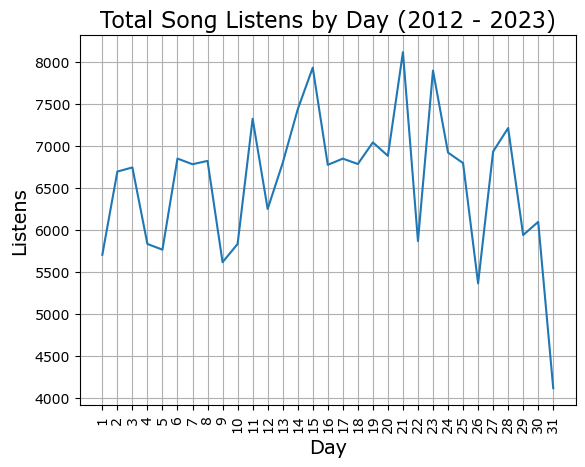

In [15]:
songs_by_day = df.groupby(df.ts.dt.day).size().to_frame().rename({0 : 'listen_count'}, axis=1)
songs_by_day.reset_index(inplace=True)

plt.plot(songs_by_day.ts, songs_by_day.listen_count)
plt.title(f'Total Song Listens by Day ({year_min} - {year_max})', fontsize=16)
plt.ylabel('Listens', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.xticks(songs_by_day.ts, rotation=90)
plt.grid(True)
plt.show()

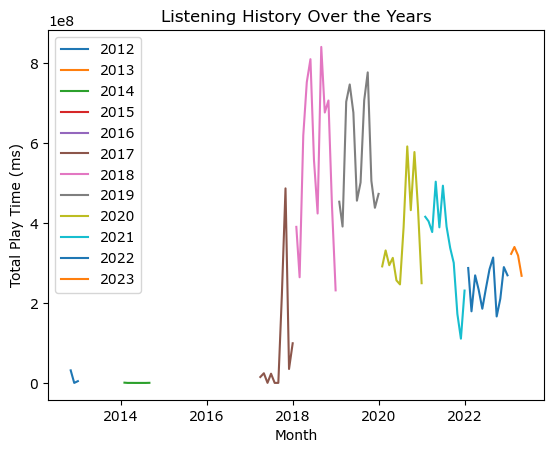

In [16]:
# Convert the 'ts' column to a datetime object and set it as the index

df_ = df.set_index('ts')

# Resample the MyData by year and calculate the sum of 'ms_played' for each year
yearly_data = df_.resample('Y').sum()

# Create a line graph with each year's MyData on a different line
for year in yearly_data.index.year:
    plt.plot(df_.loc[str(year), 'ms_played'].resample('M').sum(), label=str(year))

# Add a legend, title, x-axis label, and y-axis label to the graph
plt.legend()
plt.title('Listening History Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Play Time (ms)')
plt.show()

In [17]:
df_ = df.set_index('ts')

# Calculate the total number of full listens per day
full_listens_per_day = df_[df_['reason_end'] == 'trackdone']['ms_played'].resample('D').sum() / 30e3
full_listens_per_day = df_[df_['skipped'] == True]['skipped'].resample('D').sum()

# Calculate the total number of skipped tracks per day
skipped_tracks_per_day = df_[df_['skipped'] == True]['skipped'].resample('D').sum()

# Calculate the average full listens per day and skipped tracks per day
avg_full_listens_per_day = full_listens_per_day.mean()
avg_skipped_tracks_per_day = skipped_tracks_per_day.mean()

# Print the results
print('Average full listens per day:', avg_full_listens_per_day)
print('Average skipped tracks per day:', avg_skipped_tracks_per_day)

Average full listens per day: 1.6419270833333333
Average skipped tracks per day: 1.6419270833333333


In [18]:
# Calculate the total number of full listens
full_listens = df_[df_['reason_end'] == 'trackdone']['ms_played'].count()

# Calculate the total number of skipped tracks
skipped_tracks = df_[df_['skipped'] == False]['skipped'].count()

# Calculate the ratio of skipped tracks to full listens
skipped_to_full_ratio = skipped_tracks / full_listens

# Print the result
print('Ratio of skipped tracks to full listens:', skipped_to_full_ratio)


Ratio of skipped tracks to full listens: 0.08309042899763383


In [19]:
# Sort the DataFrame by timestamp
df_ = df.sort_values('ts')

# Calculate the time difference between each row and the previous row
df_['time_diff'] = df_['ts'].diff()

# Calculate the time difference in seconds
df_['time_diff_sec'] = df_['time_diff'].dt.total_seconds()

# Create a mask for rows where the reason_start is not null
mask = df_['reason_start'].notnull()

# Calculate the time spent listening for each session
df_.loc[mask, 'session_time'] = df_.loc[mask, 'time_diff_sec']

# Forward-fill the session_time column to fill in the null values with the time spent listening in the previous row
df_['session_time'] = df_['session_time'].fillna(method='ffill')

# Group the DataFrame by session and calculate the total time spent listening in each session
session_times = df_.groupby('session_time')['ms_played'].sum() / 1000

# Calculate the average length of listening session
avg_session_length = session_times.mean()

# Print the result
print('Average length of listening session:', avg_session_length, 'seconds')


Average length of listening session: 3208.2094854620364 seconds


In [20]:
# Count the number of songs listened to for each hour of the day
hour_counts = df['ts'].dt.hour.value_counts()

# Find the most popular time of day for listening
most_popular_time = hour_counts.idxmax()

print('The most popular time of day for listening is:', most_popular_time, 'o\'clock')


The most popular time of day for listening is: 7 o'clock


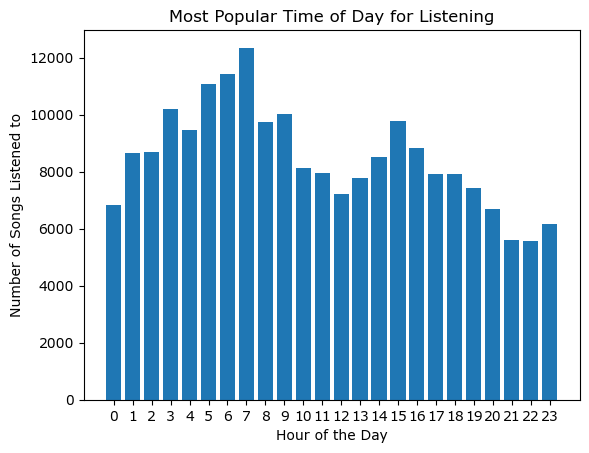

In [21]:
df_ = df.set_index('ts')

# Calculate the number of songs listened to for each hour of the day
songs_by_hour = df_.groupby(df_.index.hour)['ms_played'].count()

# Plot the MyData as a bar chart
plt.bar(songs_by_hour.index, songs_by_hour.values)

# Set the chart title and axis labels
plt.title('Most Popular Time of Day for Listening')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Songs Listened to')
plt.xticks(range(24))

# Show the chart
plt.show()


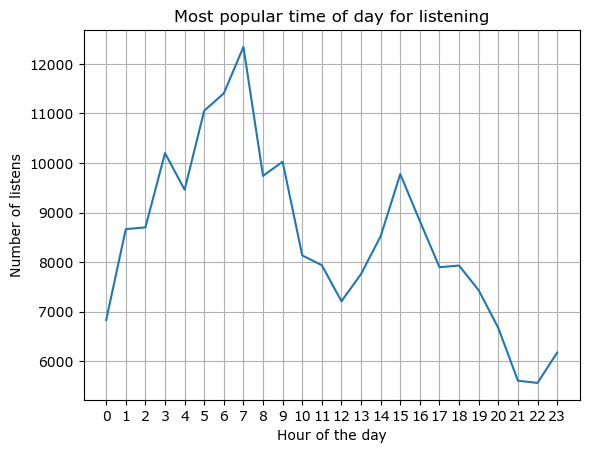

In [22]:
# Group the MyData by the hour of the day and calculate the average number of listens for each hour
hourly_listens = df.groupby(df['ts'].dt.hour)['ms_played'].count().reset_index(name='count')
hourly_listens['hour'] = hourly_listens['ts']
hourly_listens = hourly_listens[['hour', 'count']]

# Plot the MyData as a line graph
plt.plot(hourly_listens['hour'], hourly_listens['count'])
plt.xticks(range(24))
plt.xlabel('Hour of the day')
plt.ylabel('Number of listens')
plt.title('Most popular time of day for listening')
plt.grid(True)
plt.show()
